In [0]:
# Desccription: Stock price prediction using LSTM for Apple Inc.

In [0]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# get stock quote
df = web.DataReader('INTC', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,19.226799
2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,19.673389
2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.900604
2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.783070
2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.955444
...,...,...,...,...,...,...
2019-12-11,57.169998,56.580002,56.910000,57.070000,20051100.0,57.070000
2019-12-12,58.049999,56.610001,56.750000,57.549999,27883300.0,57.549999
2019-12-13,58.340000,57.380001,57.549999,57.790001,22795200.0,57.790001


In [0]:
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD($)')

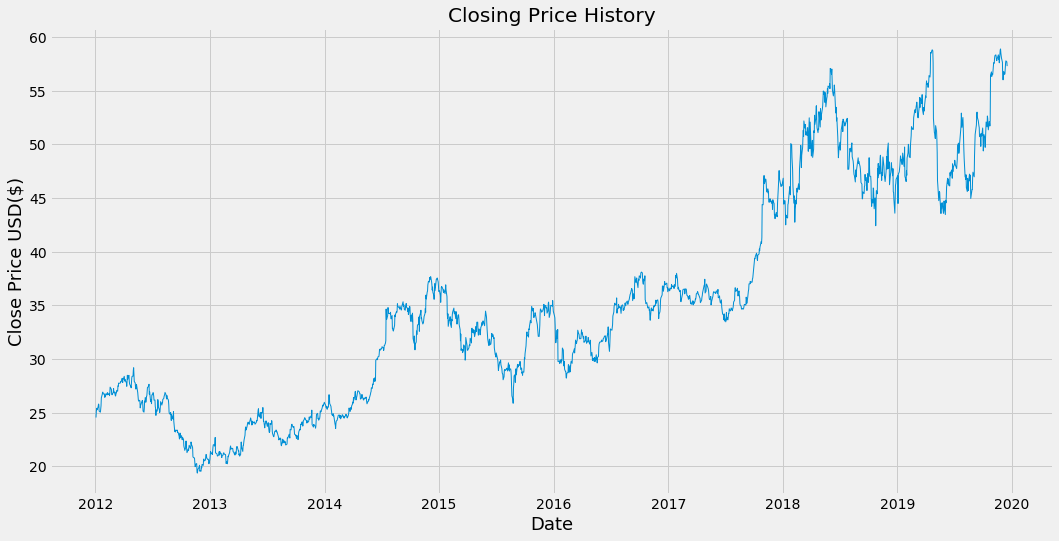

In [0]:
# visualize
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'], linewidth=1.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)

In [0]:
# Create new dataframe with 'Close' column
df = df[['Close']]
# Converting to numpy array 
dataset = df.values
# Traning data size
train_data_len = int(len(dataset)*0.8)


In [0]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.13100658],
       [0.14542235],
       [0.15275667],
       ...,
       [0.97192715],
       [0.96965097],
       [0.95953459]])

In [0]:
# Create the training dataset
training_data = scaled_data[:train_data_len, 0]
# Split the data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(training_data)):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i])



In [0]:
# convert to arrays
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
X_train.shape

(1542, 60)

In [0]:
# reshape the data as LSTM expects 3D data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_train.shape

(1542, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [0]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# train the model
model.fit(X_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
1542/1542 [==============================] - 4s 2ms/step - loss: 0.0375
Epoch 2/200
1542/1542 [==============================] - 2s 1ms/step - loss: 0.0068
Epoch 3/200
1542/1542 [==============================] - 2s 1ms/step - loss: 0.0022
Epoch 4/200
1542/1542 [==============================] - 2s 1ms/step - loss: 9.6386e-04
Epoch 5/200
1542/1542 [==============================] - 2s 1ms/step - loss: 7.8144e-04
Epoch 6/200
1542/1542 [==============================] - 2s 1ms/step - loss: 6.9161e-04
Epoch 7/200
1542/1542 [==============================] - 2s 1ms/step - loss: 6.8839e-04
Epoch 8/200
1542/1542 [==============================] - 2s 1ms/step - loss: 7.3897e-04
Epoch 9/200
1542/1542 [==============================] - 2s 1ms/step - loss: 6.8648e-04
Epoch 10/200
1542/1542 [==============================] - 2s 1ms/step - loss: 6.7633e-04
Epoch 11/200
1542/1542 [==============================] - 2s 1ms/step - loss: 7.1074e-04
Epoch 12/200
1542/1542 [==================

In [0]:
# Create test data
test_data = scaled_data[train_data_len-60:, 0]
X_test = []
y_test = []
for i in range(len(test_data)-60):
  X_test.append(test_data[i:i+60])
  y_test.append(test_data[i+60])



In [0]:
# convet to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

In [0]:
# reshape X_test
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [0]:
preds = model.predict(X_test)
evaluation = model.evaluate(X_test, y_test)

401/401 [==============================] - 1s 2ms/step


In [0]:
print(evaluation)

0.0006543715062616231


In [0]:
preds = preds.reshape(-1)

In [0]:
df.columns

Index(['Close'], dtype='object')

In [0]:
preds = scaler.inverse_transform(preds.reshape((preds.shape[0],1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


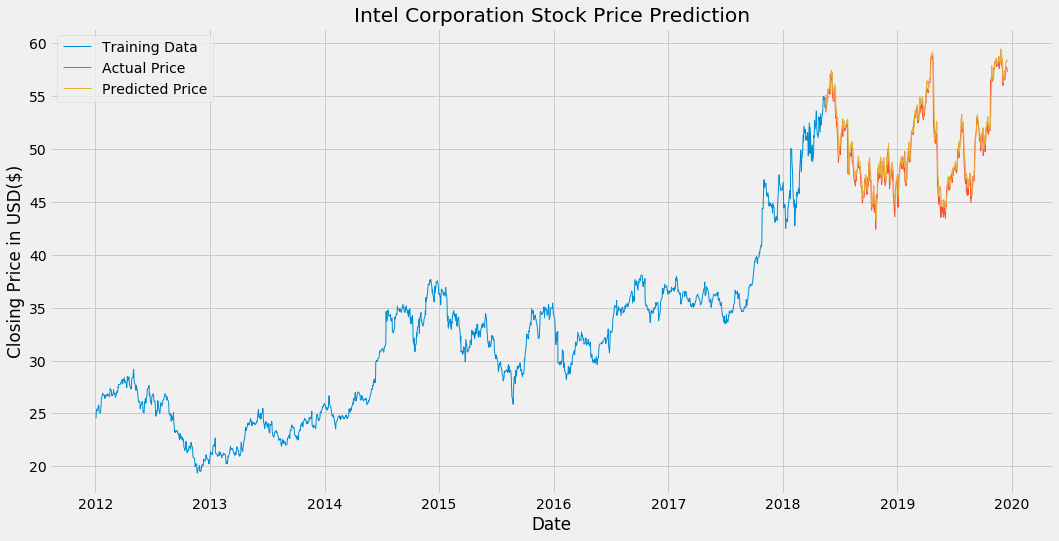

In [0]:
# plot the data
train = df[:train_data_len]
valid = df[train_data_len:]
valid['preds'] = preds
plt.figure(figsize=(16,8))
plt.plot(train, linewidth=1.0)
plt.plot(valid['Close'], linewidth=1.0)
plt.plot(valid['preds'], linewidth=1.0)
plt.xlabel('Date')
plt.ylabel('Closing Price in USD($)')
plt.title('Intel Corporation Stock Price Prediction')
plt.legend(['Training Data', 'Actual Price', 'Predicted Price'])